# RFM: Recency, Frequency, Monetary Analysis


In [1]:
#import libraray needed
import utility as util
import pandas as pd

In [2]:
data = pd.read_csv('data_rfm.csv')

<b> 1. What percent of customers responded (i.e. bought anything) from this catalog? </b> 

In [3]:
util.tabulate(data['buyer'])

,Name,Count,Frequency
0,no,94180,0.975443
1,yes,2371,0.024557


<b> 2. Of those who bought, what was the average dollars ordered from this catalog?</b>

This code:
 - Selects R, F and M Columns

 - Groups by <code>buyer</code>

 - Take means of those columns

In [4]:
data[ ['dollars','buyer'] ].groupby('buyer').mean()

,dollars
buyer,
no,0.000000
yes,104.242935


In [5]:
util.pwcorr(data[ ['last','numords','totdol'] ])

(             last   numords    totdol
 last     1.000000 -0.206206 -0.187829
 numords -0.206206  1.000000  0.842448
 totdol  -0.187829  0.842448  1.000000,
          last  numords  totdol
 last      0.0      0.0     0.0
 numords   0.0      0.0     0.0
 totdol    0.0      0.0     0.0)

<b> 3. Create decile variables for recency, frequency and monetary. (Hint: use ntile command from mba263 module) </b>

In [6]:
ntile = 5
data['rec_dec'] = util.ntile(data['last'],ntile)
data['freq_dec'] = util.ntile(data['numords'],ntile)
data['mv_dec'] = util.ntile(data['totdol'],ntile)

data['freq_dec_r'] = (ntile -1) - data['freq_dec']
data['mv_dec_r'] = (ntile -1) - data['mv_dec']

<b> 4. Create a bar chart showing the response rate (i.e., the proportion of customers who bought something) to this catalog by recency decile.</b>

Text(0.5, 0, 'Monetary')

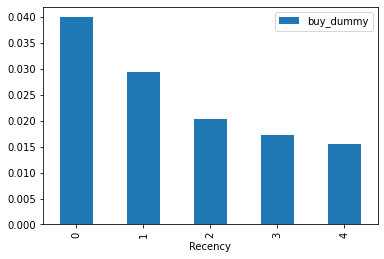

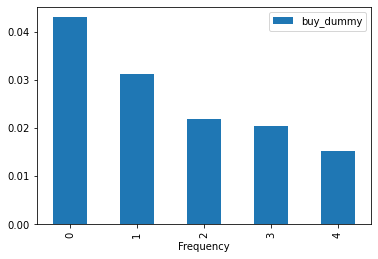

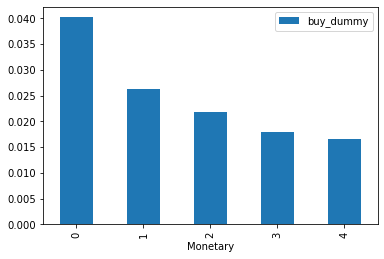

In [7]:
data['buy_dummy']=pd.get_dummies(data['buyer'])['yes']

data[ ['buy_dummy','rec_dec'] ].groupby('rec_dec').mean().plot(kind='bar').set_xlabel('Recency')
data[ ['buy_dummy','freq_dec_r'] ].groupby('freq_dec_r').mean().plot(kind='bar').set_xlabel('Frequency')
data[ ['buy_dummy','mv_dec_r'] ].groupby('mv_dec_r').mean().plot(kind='bar').set_xlabel('Monetary')


<b> 7.	Using only those customers who placed an order from this catalog, create three bar charts showing the average dollars ordered from this catalog by recency, frequency and monetary deciles, respectively. (Hint: first create a data frame with those rows that ordered, and use groupby(...).mean().plot(...) on the restricted data) </b>

In [8]:
# filter data by only those customers who placed an order from this catalog
data_buy = data[data['buyer'] == 'yes']

Text(0.5, 0, 'Monetary')

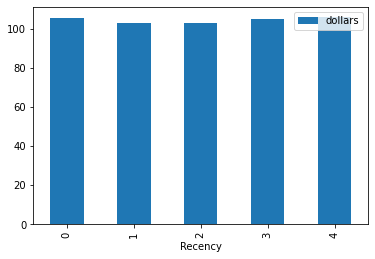

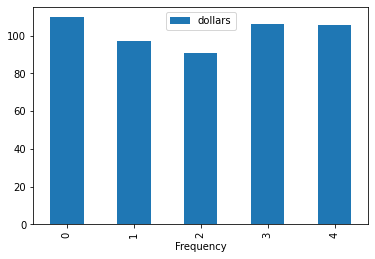

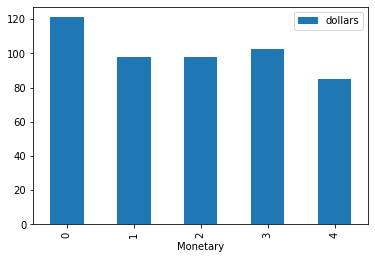

In [9]:
data_buy[ ['dollars','rec_dec'] ].groupby('rec_dec').mean().plot(kind='bar').set_xlabel('Recency')
data_buy[ ['dollars','freq_dec_r'] ].groupby('freq_dec_r').mean().plot(kind='bar').set_xlabel('Frequency')
data_buy[ ['dollars','mv_dec_r'] ].groupby('mv_dec_r').mean().plot(kind='bar').set_xlabel('Monetary')

<b> 9 (a) the expected gross profit in dollars </b>

In [10]:
# calculate gross profit
sample_cus = 96551
total_cus = 1931020
num_mail = total_cus - sample_cus
margin = 0.5
cost_mail = 1

avg_rev = data['dollars'].mean()

res_rate = (data['buyer'].value_counts()['yes'] / len(data['buyer']))

profit = num_mail * avg_rev * margin - num_mail * cost_mail
print (profit)

513551.0


<b> 9 (b) the expected gross profit as a % of expected gross sales </b>

In [11]:
profit_per = profit / (num_mail * avg_rev)
print (profit_per) 

0.1093583104062146


<b> 9 (c) the expected return on market expenditure </b>

In [12]:
ROI = profit / (num_mail * cost_mail) 
print (ROI)

0.27994531387556837


<b> 10.	What is the breakeven response rate? </b>

In [13]:
# calculate break-even response rate
unit_rev = data[data['buyer'] == 'yes']['dollars'].mean()
unit_profit = unit_rev * margin
res_even = cost_mail / unit_profit
print (res_even) 

0.019185952419485355


<b> 11.	Determine which RFM segments (using the sequential n-tiles approach) have response rates exceeding the breakeven rate. </b>

In [14]:
data_seg = data.groupby('rfm1')['buy_dummy'].mean()
target_RFM = data_seg[data_seg > res_even]
print (target_RFM)

rfm1
111    0.087622
112    0.077886
113    0.065460
114    0.065551
115    0.060858
         ...   
513    0.021523
514    0.030000
515    0.019835
524    0.027174
533    0.022576
Name: buy_dummy, Length: 75, dtype: float64


   <b> Determine the number of customers belonging to these profitable segments. </b>

In [16]:
#Assign every customer a response from their RFM cell
data['responserate_sq']=util.get_means(data['buy_dummy'],data['rfm1'])
data['profitable_sq']=(data['responserate_sq']>res_even) *1
customer_profitable = data[data['profitable_sq']==1]
len(customer_profitable)

52289

   <b> Determine the number of buyers belonging to these profitable segments. </b>

In [17]:
buyer_profitable = data[(data['profitable_sq'] == 1) & (data['buy_dummy'] == 1)]
len(buyer_profitable)

1757

<b> 11 (a) the expected gross profit in dollars </b>

In [18]:
# calculate gross profit
mail_rate_rfm = len(customer_profitable)/ sample_cus
res_rate_rfm = len(buyer_profitable)/ len(customer_profitable)

profit_rfm = num_mail * mail_rate_rfm * res_rate_rfm * unit_profit - num_mail * mail_rate_rfm * cost_mail
print (profit_rfm)

746479.95740194


<b> 11 (b) the expected gross profit as a % of expected gross sales </b>

In [19]:
profit_rfm_per = profit_rfm / (num_mail * mail_rate_rfm * res_rate_rfm * unit_rev)
print (profit_rfm_per) 

0.21450931529241044


<b> 11 (c) the expected return on market expenditure </b>

In [20]:
ROI_rfm = profit_rfm / (num_mail * mail_rate_rfm * cost_mail) 
print (ROI_rfm)

0.7513706288249616


In [21]:
profit_capture =  (num_mail * mail_rate_rfm * res_rate_rfm)/(res_rate * num_mail)
print (profit_capture)

0.7410375369042598


 <b> 12. Examine the first 20 or so observations in the database. What do you notice about the RFM1 and RFM2 values? That is – do the two approaches generally yield the same RFM index for any given customer? What do you see as the pros and cons of the two approaches (from a statistical as well as logical perspective) and why? </b>

In [22]:
data['responserate_sq']=util.get_means(data['buy_dummy'],data['rfm1'])
data['responserate_iq']=util.get_means(data['buy_dummy'],data['rfm2'])
data.head(20)

,numords,totdol,last,buyer,dollars,rfm1,rfm2,rec_dec,freq_dec,mv_dec,freq_dec_r,mv_dec_r,buy_dummy,responserate_sq,profitable_sq,responserate_iq
0,7,493,207,no,0,222,211,1,4,4,0,0,0,0.029308,1,0.049986
1,4,423,625,no,0,421,422,3,3,3,1,1,0,0.028832,1,0.025612
2,4,246,28,no,0,134,122,0,3,3,1,1,0,0.043630,1,0.045492
3,3,271,778,no,0,523,532,4,2,3,2,1,0,0.018349,0,0.018382
4,2,148,396,no,0,343,343,2,1,2,3,2,0,0.018158,0,0.020553
5,10,937,6,no,0,121,111,0,4,4,0,0,0,0.031250,1,0.061794
6,7,562,38,no,0,123,111,0,4,4,0,0,0,0.046802,1,0.061794
7,1,156,759,no,0,552,553,4,0,2,4,2,0,0.013973,0,0.009832
8,1,59,604,no,0,454,455,3,0,0,4,4,0,0.010039,0,0.011859
9,1,34,7,no,0,155,155,0,0,0,4,4,0,0.021968,1,0.028162


<AxesSubplot:xlabel='rfm2'>

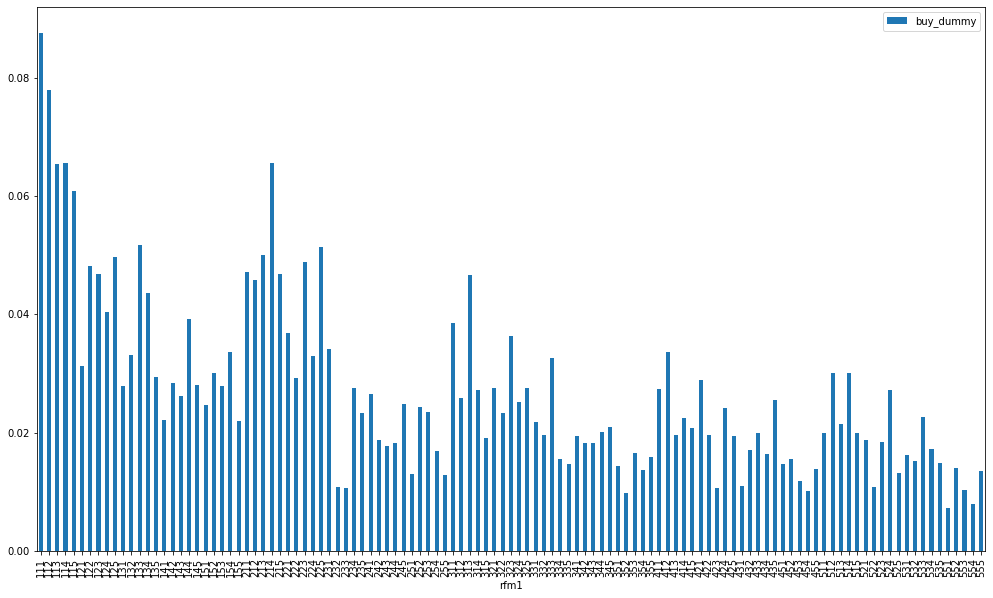

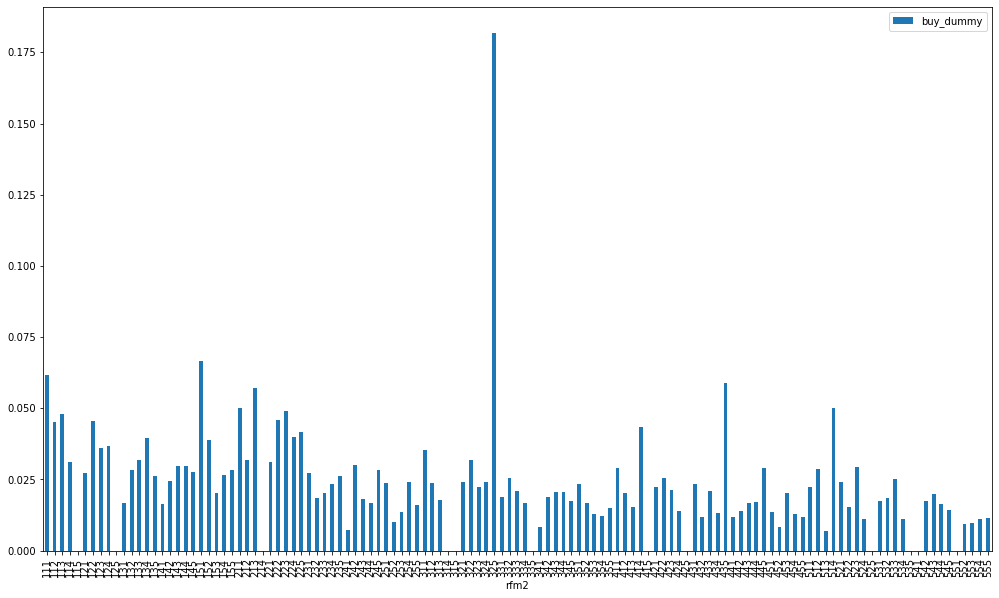

In [23]:
data[ ['buy_dummy','rfm1'] ].groupby('rfm1').mean().plot(kind='bar',figsize=[17, 10])
data[ ['buy_dummy','rfm2'] ].groupby('rfm2').mean().plot(kind='bar',figsize=[17, 10])

In [24]:
max_rfm2 = data['responserate_iq'].idxmax() 

# Get the bin of max value 

print (data.loc[max_rfm2 , 'rfm2'] )

325
